In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# class "CarDataLoader" has a constructor that only reads csv from a file_path
class CarDataLoader:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

In [70]:
# here we load the file path with cat_data.csv, later, we can add another path
file_path = 'car_data.csv'

# Load the data
car_loader = CarDataLoader(file_path)
car_loader.df.head()

,_id,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,1,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,2,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,3,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,4,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,5,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [72]:
car_loader.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               24973 non-null  int64  
 1   Brand             22836 non-null  object 
 2   Condition         22837 non-null  object 
 3   Fuel              22528 non-null  object 
 4   KMs Driven        22687 non-null  float64
 5   Model             22525 non-null  object 
 6   Price             24973 non-null  int64  
 7   Registered City   20337 non-null  object 
 8   Transaction Type  22528 non-null  object 
 9   Year              22689 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.9+ MB


In [78]:
# class CarDataAnalysis inherits from carloader is initiated
class CarDataAnalysis(CarDataLoader):
    def __init__(self, file_path):
        super().__init__(file_path) # use super() to refer to the super class. In our case, we tell this class to load the data here
    
    def get_summary(self): #This function gets info() and describe() -> statistical analysis
        print("Data Info:")
        self.df.info()
        print("\nDescription:")
        return self.df.describe()
    
    def plot_distribution(self, column): #This function plots ditribution of any column 
        if column in self.df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.df[column].dropna(), kde=True)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column {column} does not exist in the dataset.")
    
    def plot_relationship(self, column1, column2):
        if column1 in self.df.columns and column2 in self.df.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=self.df[column1], y=self.df[column2])
            plt.title(f'Relationship between {column1} and {column2}')
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()
        else:
            print(f"Columns {column1} and/or {column2} do not exist in the dataset.")
    
    def plot_correlation_matrix(self):
        # Filter only numerical columns
        numeric_columns = self.df.select_dtypes(include=['number'])

        plt.figure(figsize=(12, 8))
        corr_matrix = numeric_columns.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()
    
    def plot_missing_values_heatmap(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Heatmap of Missing Values')
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               24973 non-null  int64  
 1   Brand             22836 non-null  object 
 2   Condition         22837 non-null  object 
 3   Fuel              22528 non-null  object 
 4   KMs Driven        22687 non-null  float64
 5   Model             22525 non-null  object 
 6   Price             24973 non-null  int64  
 7   Registered City   20337 non-null  object 
 8   Transaction Type  22528 non-null  object 
 9   Year              22689 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.9+ MB

Description:
                _id    KMs Driven         Price          Year
count  24973.000000  2.268700e+04  2.497300e+04  22689.000000
mean   12487.000000  1.278112e+05  9.128953e+05   2005.901626
std     7209.228472  5.996726e+05  1.537134e+06      9

C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


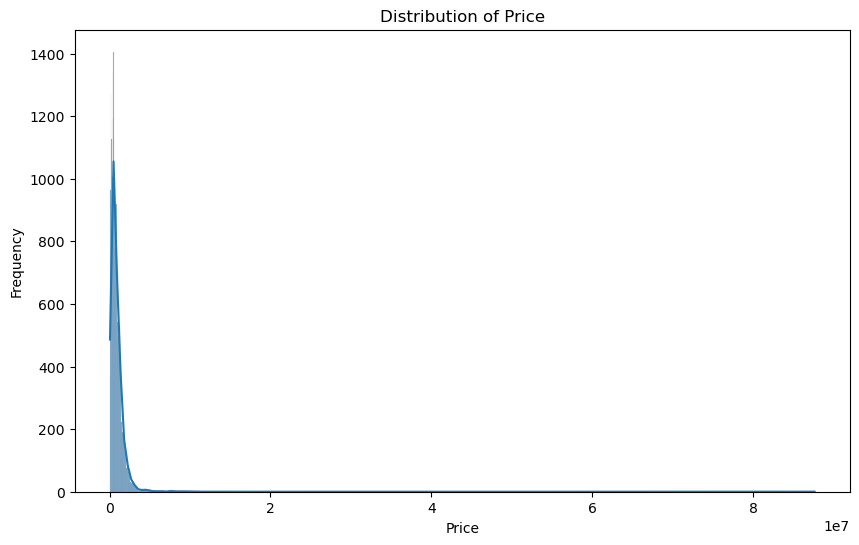

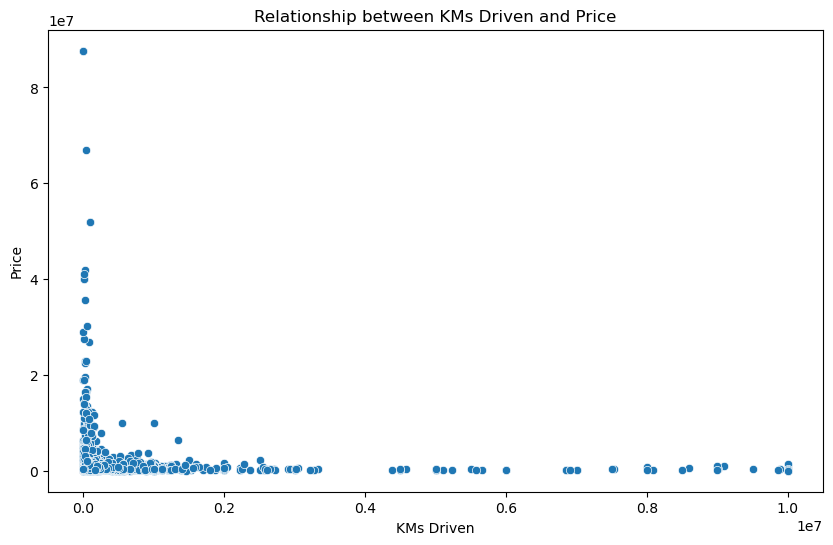

In [84]:
# Analyze the data
car_analysis = CarDataAnalysis(file_path)
summary = car_analysis.get_summary()
print(summary)

car_analysis.plot_distribution('Price')
car_analysis.plot_relationship('KMs Driven', 'Price')

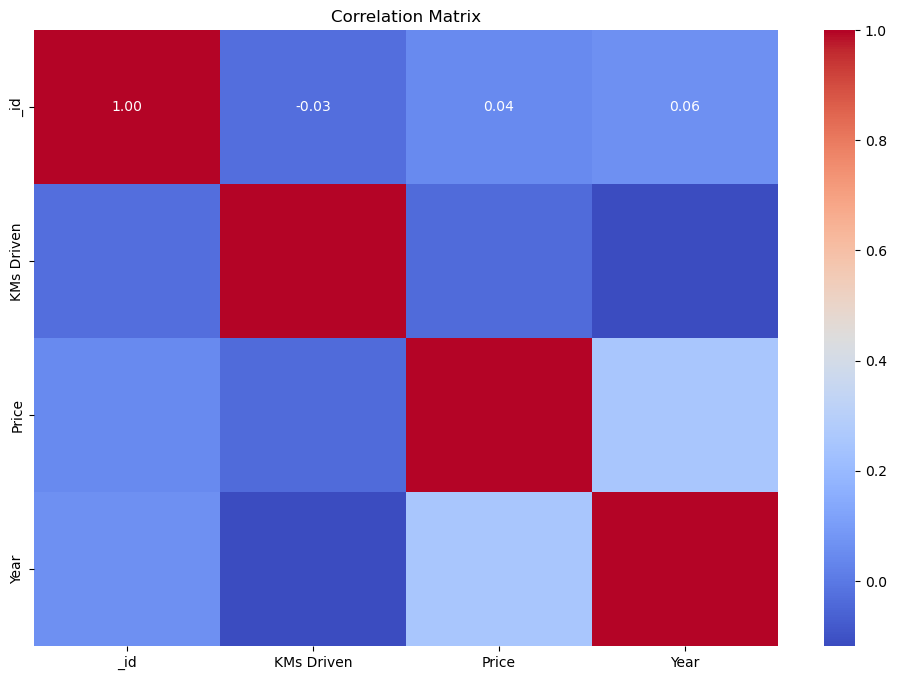

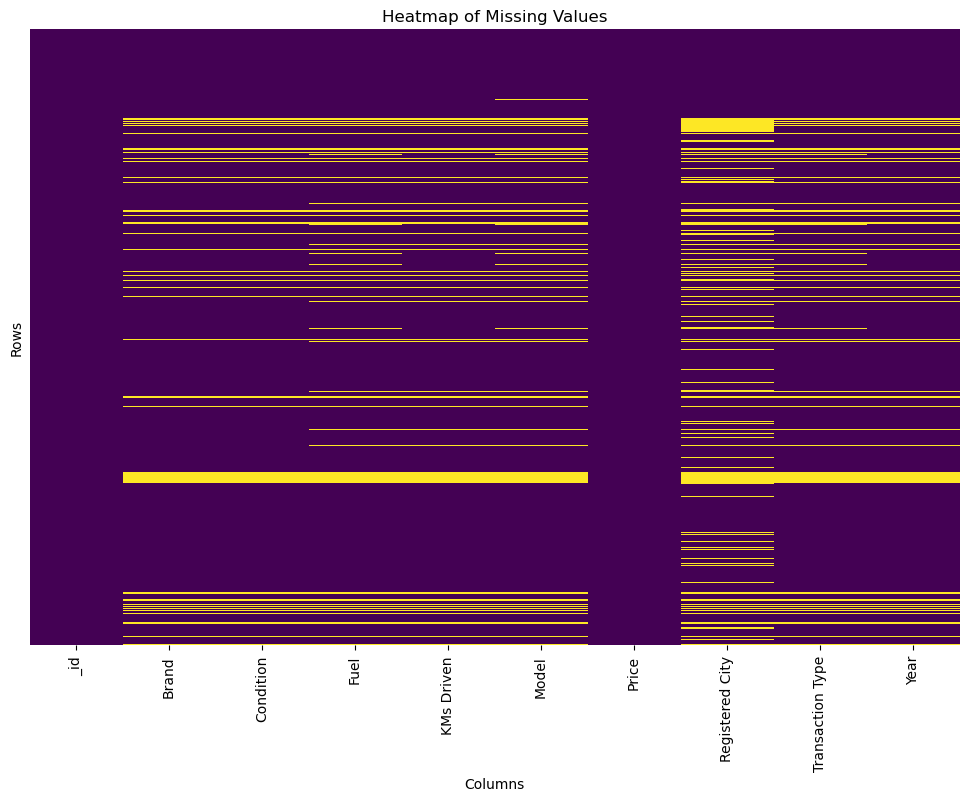

In [86]:
car_analysis.plot_correlation_matrix()
car_analysis.plot_missing_values_heatmap()

In [88]:
class CarDataCleaner(CarDataAnalysis):
    def __init__(self, file_path):
        super().__init__(file_path)
    
    def remove_duplicates(self):
        self.df.drop_duplicates(inplace=True)
        print("Duplicates removed.")
    
    def handle_missing_values(self):
        # Handle missing values for categorical features
        categorical_features = self.df.select_dtypes(include=['object']).columns
        for col in categorical_features:
            self.df[col].fillna('Unknown', inplace=True)
        
        # Handle missing values for numerical features
        numerical_features = self.df.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_features:
            if self.df[col].dtype == 'float64':
                # Use mean for continuous variables
                mean_value = self.df[col].mean()
                self.df[col].fillna(mean_value, inplace=True)
            elif self.df[col].dtype == 'int64':
                # Use median for discrete variables
                median_value = self.df[col].median()
                self.df[col].fillna(median_value, inplace=True)
        
        print("Missing values handled.")
    
    def clean_column_names(self):
        self.df.columns = self.df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
        print("Column names cleaned.")

Duplicates removed.
Missing values handled.
Column names cleaned.
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               24973 non-null  int64  
 1   Brand             24973 non-null  object 
 2   Condition         24973 non-null  object 
 3   Fuel              24973 non-null  object 
 4   KMs_Driven        24973 non-null  float64
 5   Model             24973 non-null  object 
 6   Price             24973 non-null  int64  
 7   Registered_City   24973 non-null  object 
 8   Transaction_Type  24973 non-null  object 
 9   Year              24973 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.9+ MB

Description:
                _id    KMs_Driven         Price          Year
count  24973.000000  2.497300e+04  2.497300e+04  24973.000000
mean   12487.000000  1.278112e+05  9.128953e+05   

C:\Users\jack\AppData\Local\Temp\ipykernel_32844\1069900707.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna('Unknown', inplace=True)
C:\Users\jack\AppData\Local\Temp\ipykernel_32844\1069900707.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

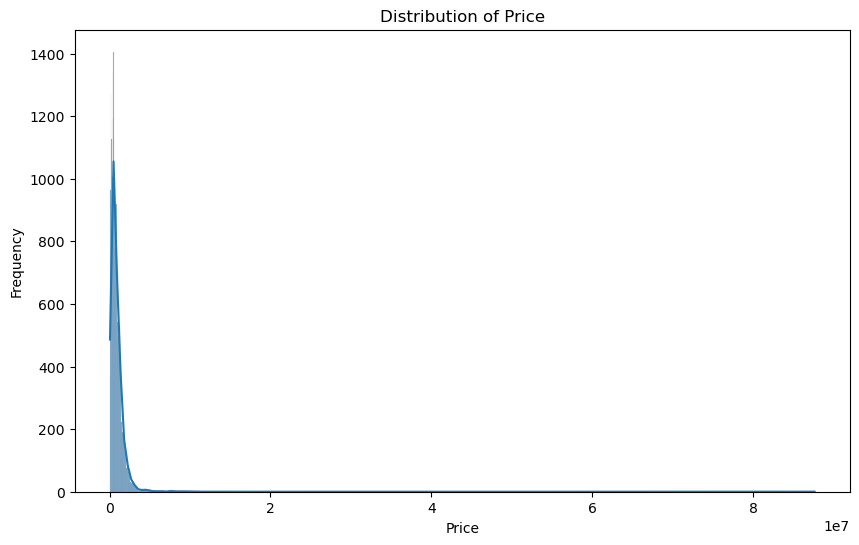

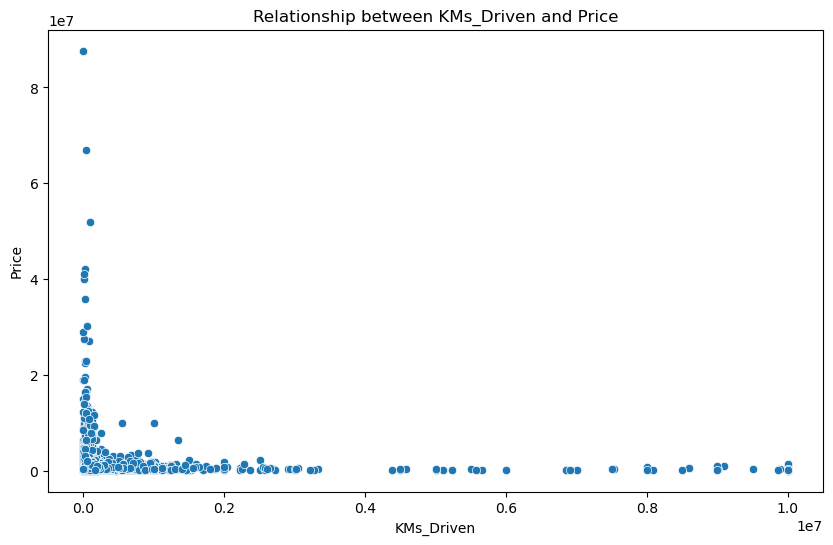

In [96]:
# Clean the data
car_cleaner = CarDataCleaner(file_path)
car_cleaner.remove_duplicates()
car_cleaner.handle_missing_values()
car_cleaner.clean_column_names()

# Perform analysis after cleaning
summary_cleaned = car_cleaner.get_summary()
print(summary_cleaned)

car_cleaner.plot_distribution('Price')
car_cleaner.plot_relationship('KMs_Driven', 'Price')

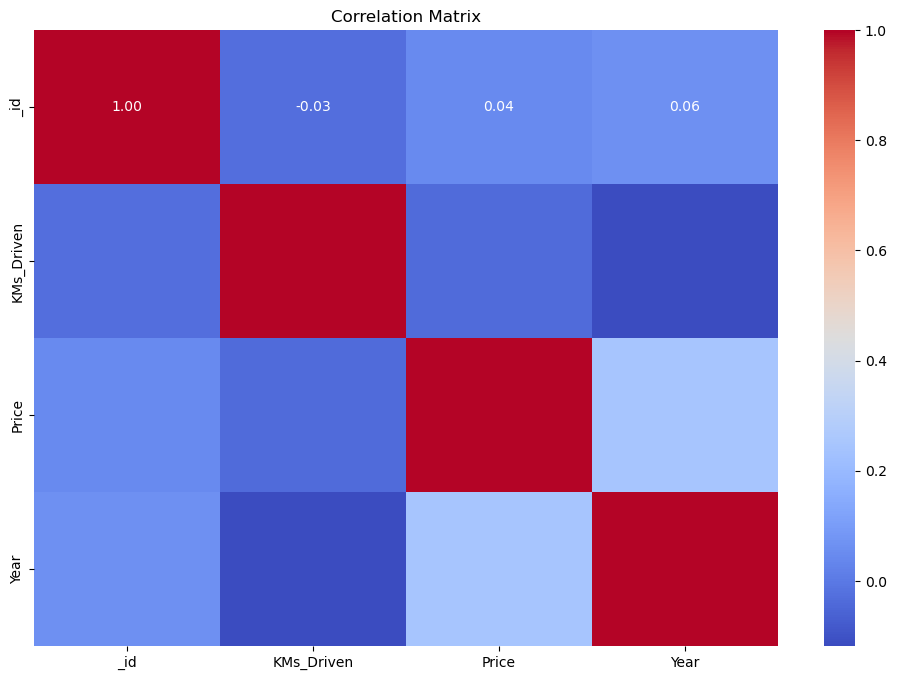

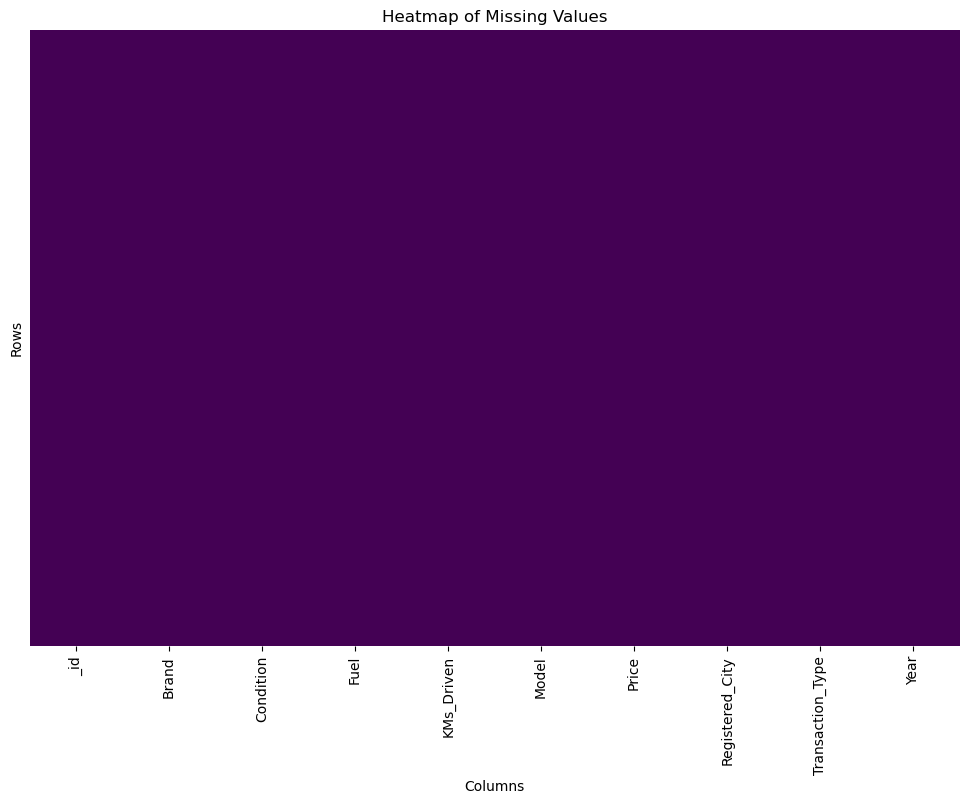

In [98]:
car_cleaner.plot_correlation_matrix()
car_cleaner.plot_missing_values_heatmap()

In [112]:
class CarDataEDA(CarDataCleaner):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.remove_duplicates()
        self.handle_missing_values()
        self.clean_column_names()
    
    def plot_categorical_distribution(self, column):
        if column in self.df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=self.df, x=column)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Column {column} does not exist in the dataset.")
    
    def plot_boxplot(self, column1, column2):
        if column1 in self.df.columns and column2 in self.df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=self.df, x=column1, y=column2)
            plt.title(f'Boxplot of {column2} by {column1}')
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Columns {column1} and/or {column2} do not exist in the dataset.")
    
    def plot_pairplot(self):
        sns.pairplot(self.df)
        plt.title('Pairplot of All Numerical Features')
        plt.show()
    
    def plot_correlation_heatmap(self):
        plt.figure(figsize=(12, 8))
        # Select only numerical columns for the correlation matrix
        numerical_df = self.df.select_dtypes(include=['float64', 'int64'])
        corr_matrix = numerical_df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Numerical Features')
        plt.show()

Duplicates removed.
Missing values handled.
Column names cleaned.
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               24973 non-null  int64  
 1   Brand             24973 non-null  object 
 2   Condition         24973 non-null  object 
 3   Fuel              24973 non-null  object 
 4   KMs_Driven        24973 non-null  float64
 5   Model             24973 non-null  object 
 6   Price             24973 non-null  int64  
 7   Registered_City   24973 non-null  object 
 8   Transaction_Type  24973 non-null  object 
 9   Year              24973 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.9+ MB

Description:
                _id    KMs_Driven         Price          Year
count  24973.000000  2.497300e+04  2.497300e+04  24973.000000
mean   12487.000000  1.278112e+05  9.128953e+05   

C:\Users\jack\AppData\Local\Temp\ipykernel_32844\1069900707.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna('Unknown', inplace=True)
C:\Users\jack\AppData\Local\Temp\ipykernel_32844\1069900707.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

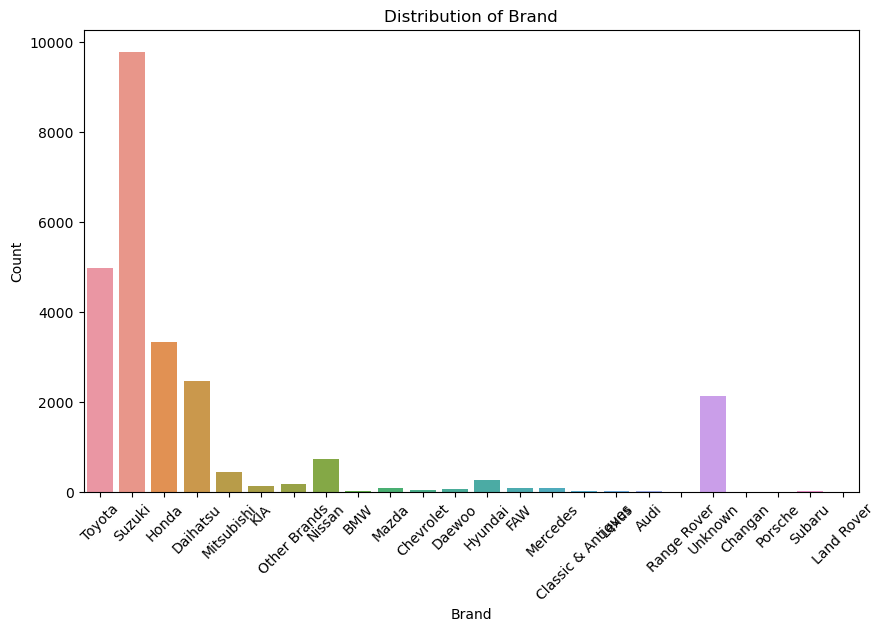

In [114]:
# Perform EDA on the data
car_eda = CarDataEDA(file_path)

# Summary of the data
summary_eda = car_eda.get_summary()
print(summary_eda)

# Plot distribution of a categorical column
car_eda.plot_categorical_distribution('Brand')

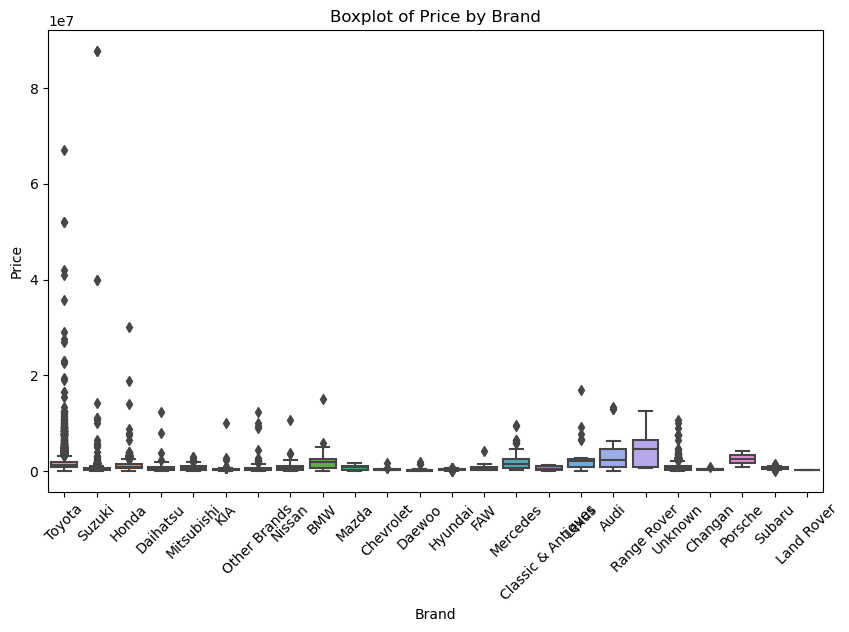

In [116]:
# Plot boxplot between a categorical and numerical column
car_eda.plot_boxplot('Brand', 'Price')

C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

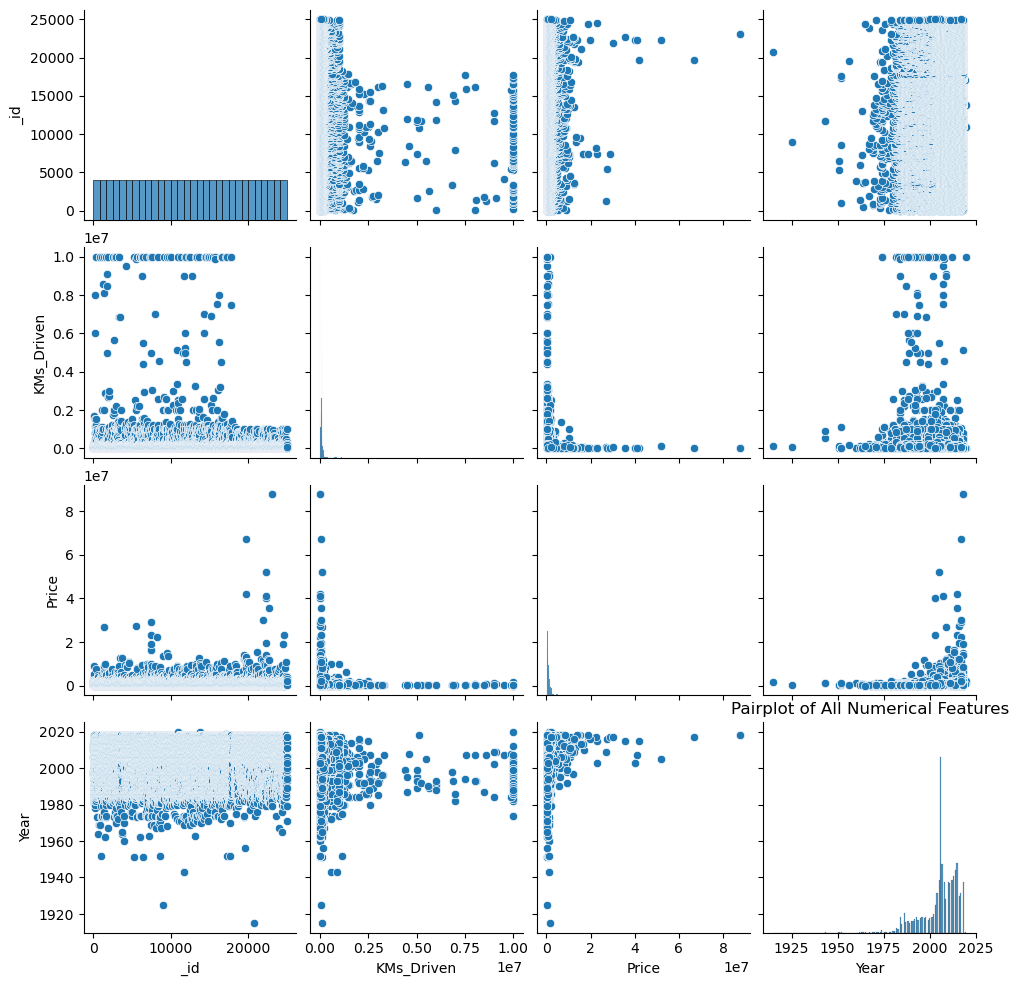

In [117]:
# Plot pairplot of all numerical features
car_eda.plot_pairplot()

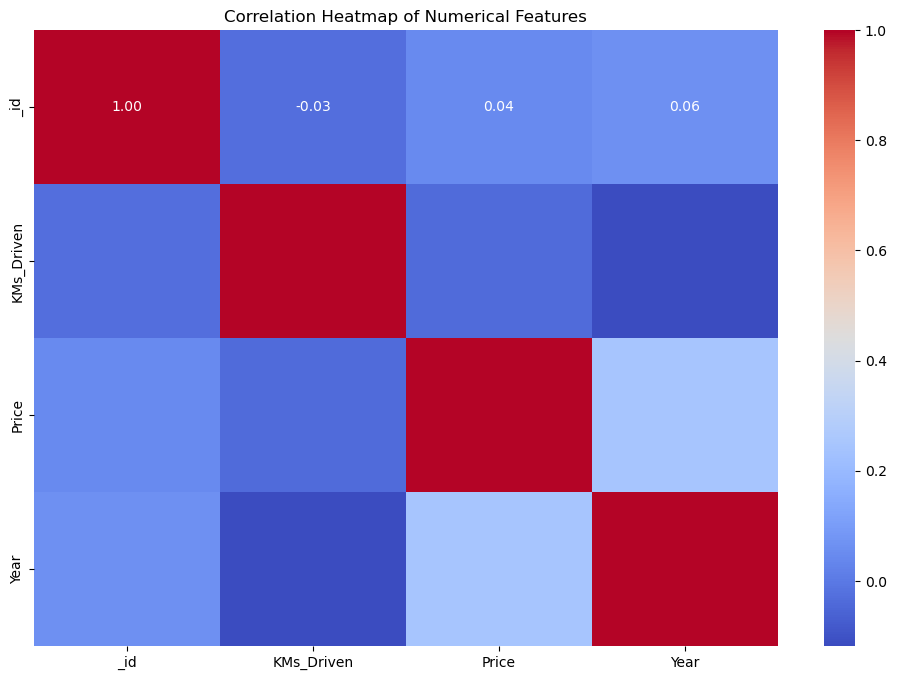

In [119]:
# Plot correlation heatmap of numerical features
car_eda.plot_correlation_heatmap()